# Juliaで学ぶタイトバインディング模型とトポロジカル物質
## 番外編：ずらした二層グラフェンのプロット
Magic Angle Grapheneというものが話題となっている。1度ほどずらした角度で二枚のグラフェンを重ね合わせて、ゲート電圧を調整すると超伝導が出るという話である。

Y. Cao, et al. "Unconventional superconductivity in magic-angle graphene superlattices", Nature (2018): doi:10.1038/nature26160

http://www.nature.com/articles/nature26160

プレプリントバージョンはこちら。Natureを読めない環境ならこちらを参照。
https://arxiv.org/abs/1803.02342

グラフェンを二枚重ねた時の格子はモアレパターンが見られることが知られている。
これをJuliaで実装してモアレパターンを見てみよう。

### 一層グラフェン
一層グラフェン、つまり普通のグラフェンである。
基本格子ベクトルは
$$
{\bf a}_1 = (\sqrt(3)/2 \: -1/2)
$$
$$
{\bf a}_2 = (\sqrt(3)/2 \: 1/2)
$$
であり、この二つのベクトルで囲った領域を「ユニットセル」と呼ぶ。
この二つのベクトルを用いると、グラフェンの二種類の炭素原子は
$$
d{\bf r}_A = 2 {\bf a}_1/3 + 2 {\bf a}_2/3
$$
$$
d{\bf r}_B = {\bf a}_1/3 + {\bf a}_2/3
$$
という場所にある。これを図示してみよう。

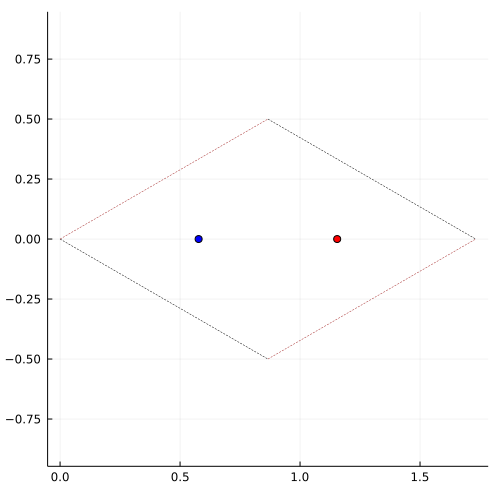

In [1]:
using Plots

a1 = [sqrt(3)/2,-1/2]
a2 = [sqrt(3)/2,1/2]
drA = 2a1/3+2a2/3
drB = a1/3+a2/3  

lw = 0.5
ls = :dash

plot(size=(500,500), legend=false)
plot!([drA[1]],[drA[2]],marker=:circle,color="red") #原子A
plot!([drB[1]],[drB[2]],marker=:circle,color="blue") #原子B
plot!([0,a1[1]],[0,a1[2]],  lw=lw, ls =ls,color="black") #a1
plot!([a2[1],a2[1]+a1[1]],[a2[2],a2[2]+a1[2]],  lw=lw, ls =ls,color="black") #a1
plot!([0,a2[1]],[0,a2[2]],  lw=lw, ls =ls,color="brown") #a2
plot!([a1[1],a1[1]+a2[1]],[a1[2],a1[2]+a2[2]],  lw=lw, ls =ls,color="brown") #a2

plot!(aspect_ratio=:equal)

このユニットセルを繰り返してタイリングすることで、グラフェンの格子を作ることができる。
菱形の左の角を原点${\bf r}$として、この原点をずらしていけば、タイルを作ることができる。つまり、
$$
{\bf r}(n,m) = n {\bf a}_1 + m {\bf a}_2
$$
という二つの整数$n,m$を用意すれば、原子Aと原子Bの座標は
$$
{\bf r}_A(n,m) ={\bf r}(n,m) + d{\bf r}_A
$$
$$
{\bf r}_B(n,m) ={\bf r}(n,m) + d{\bf r}_B
$$
と書くことができる。実際に描いてみよう。

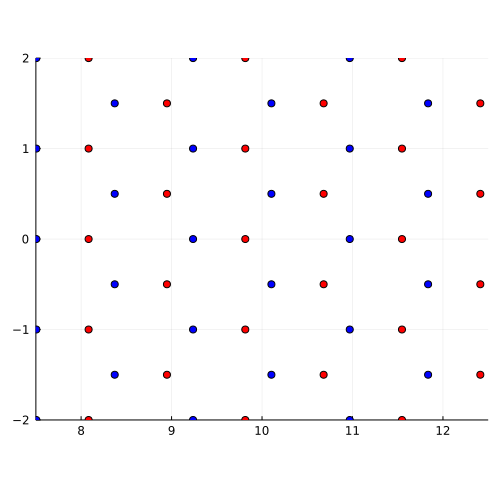

In [2]:
r(n,m)=n*a1+m*a2
Nx=10
Ny=10
plot(size=(500,500), legend=false)
for n in 1:Nx
    for m in 1:Ny
        rA = r(n,m)+drA
        rB = r(n,m)+drB
        plot!([rA[1]],[rA[2]],marker=:circle,color="red") #原子A
        plot!([rB[1]],[rB[2]],marker=:circle,color="blue") #原子B
    end
end

plot!(xlim=(7.5,12.5),ylim=(-2,2),aspect_ratio=:equal)

原子と原子の線を結んでみよう。

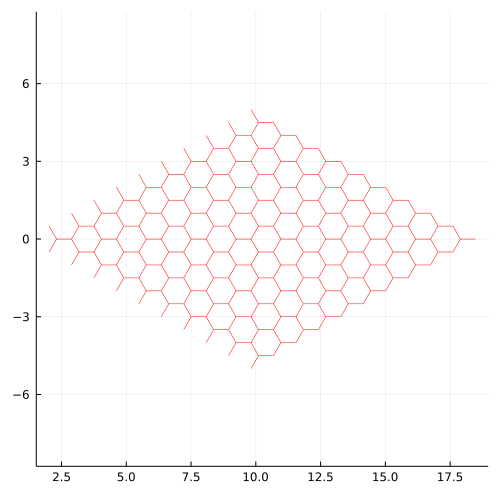

In [3]:
Nx=10
Ny=10
plot(size=(500,500), legend=false)
for n in 1:Nx
    for m in 1:Ny
        rA = r(n,m)+drA
        rB = r(n,m)+drB
        plot!([rA[1],rB[1]],[rA[2],rB[2]], color="red", lw=lw)
        plot!([rA[1]-a1[1],rB[1]],[rA[2]-a1[2],rB[2]], color="red", lw=lw)
        plot!([rA[1]-a2[1],rB[1]],[rA[2]-a2[2],rB[2]], color="red", lw=lw)
    end
end

plot!(aspect_ratio=:equal)


### 二層グラフェン
次に少しだけずらしてグラフェンを重ねてみよう。基本格子ベクトルを傾けることで、ずらしたグラフェンを作ることができる。
ベクトルの回転は、
$$
M(\theta) = 
\left(
\begin{matrix}
\cos \theta && -\sin \theta \\
\sin \theta && \cos \theta
\end{matrix}
\right)
$$
という行列をかければ良いので、
新しい基本格子ベクトルを
$$
{\bf a}_1' =M(\theta) {\bf a}_1  
$$
$$
{\bf a}_2' =M(\theta) {\bf a}_2 
$$
とすれば、全く同じように描画することができる。

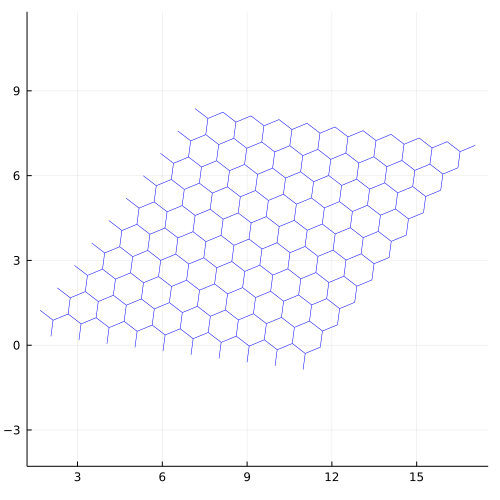

In [4]:
θ=π/8

M = [
cos(θ) -sin(θ)
sin(θ) cos(θ)
]

a1d = M*a1
a2d = M*a2
drAd = 2a1d/3+2a2d/3
drBd = a1d/3+a2d/3 
rd(n,m) = n*a1d+m*a2d

Nx=10
Ny=10
plot(size=(500,500), legend=false)
for n in 1:Nx
    for m in 1:Ny
        rAd = rd(n,m)+drAd
        rBd = rd(n,m)+drBd
        plot!([rAd[1],rBd[1]],[rAd[2],rBd[2]], color="blue", lw=lw)
        plot!([rAd[1]-a1d[1],rBd[1]],[rAd[2]-a1d[2],rBd[2]], color="blue", lw=lw)
        plot!([rAd[1]-a2d[1],rBd[1]],[rAd[2]-a2d[2],rBd[2]], color="blue", lw=lw)
    end
end


plot!(aspect_ratio=:equal)

ついでなので、関数の形にしてもう少しすっきりとさせてみる。

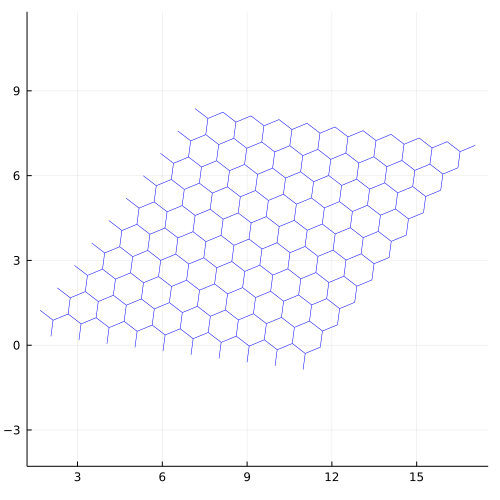

In [5]:
function plotGraphene(θ,n,m,color)
    M = [
    cos(θ) -sin(θ)
    sin(θ) cos(θ)
    ]
    a1 = [sqrt(3)/2,-1/2]
    a2 = [sqrt(3)/2,1/2]
    lw = 0.5
    ls = :dash

    a1d = M*a1
    a2d = M*a2
    drAd = 2a1d/3+2a2d/3
    drBd = a1d/3+a2d/3 
    rd = n*a1d+m*a2d

    rAd = rd+drAd
    rBd = rd+drBd
    plot!([rAd[1],rBd[1]],[rAd[2],rBd[2]], color="blue", lw=lw)
    plot!([rAd[1]-a1d[1],rBd[1]],[rAd[2]-a1d[2],rBd[2]], color=color, lw=lw)
    plot!([rAd[1]-a2d[1],rBd[1]],[rAd[2]-a2d[2],rBd[2]], color=color, lw=lw)
end

θ=π/8
Nx=10
Ny=10
plot(size=(500,500), legend=false)
for n in 1:Nx
    for m in 1:Ny
       plotGraphene(θ,n,m,"blue")
    end
end


plot!(aspect_ratio=:equal)



これで、この関数を二回呼べば二層グラフェンとなる。

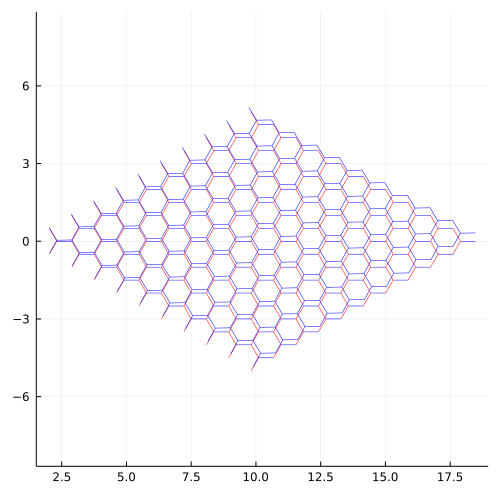

In [6]:
θ=2π/360
Nx=10
Ny=10
plot(size=(500,500), legend=false)
for n in 1:Nx
    for m in 1:Ny
       plotGraphene(0,n,m,"red")
        plotGraphene(θ,n,m,"blue")
    end
end


plot!(aspect_ratio=:equal)

広い範囲で描画してみよう。

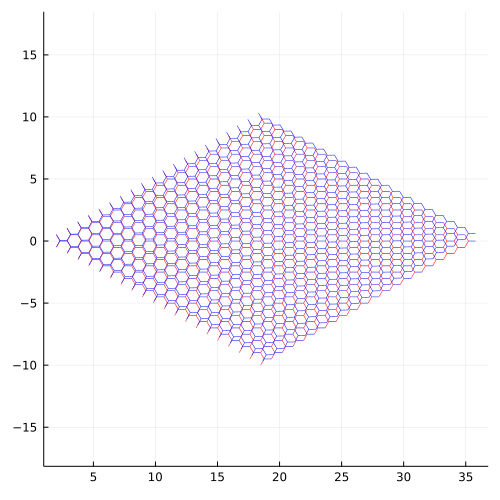

In [7]:
θ=2π/360
Nx=20
Ny=20
plot(size=(500,500), legend=false)
for n in 1:Nx
    for m in 1:Ny
       plotGraphene(0,n,m,"red")
        plotGraphene(θ,n,m,"blue")
    end
end


plot!(aspect_ratio=:equal)

適当に$\theta$を選ぶと、どこまでもお互いが揃わない模様になる。これは周期がないため
準結晶に似ている。
もし、周期のあるものが欲しければ、
$$
\cos \theta = \frac{N^2+4NM+M^2}{2(N^2+NM+M^2)}
$$
という整数$N,M$を用いれば良い。この整数が大きければ大きいほど、周期が長くなる。


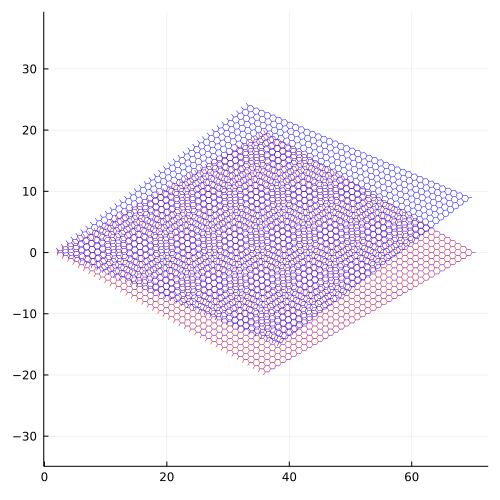

In [8]:

N = 4
M = 5

θ=acos((N^2+4N*M+M^2)/(2(N^2+N*M+M^2)))
Nx=40
Ny=40
plot(size=(500,500), legend=false)
for n in 1:Nx
    for m in 1:Ny
       plotGraphene(0,n,m,"red")
        plotGraphene(θ,n,m,"blue")
    end
end


plot!(aspect_ratio=:equal)

このように、モアレパターンが出る。